In [1]:
# %matplotlib inline

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [11]:
file_csv = "bestsellers with categories.csv"
oryginal_table = pd.read_csv(file_csv)
df = oryginal_table.copy()

Виведіть перші п'ять рядків (використовується функція head)

In [12]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [8]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет? Відповідь: 550

In [14]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

# Первинне дослідження даних



Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [15]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні) Відповідь: НІ

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [19]:
unq_genres = df['genre'].unique()
print(unq_genres)

['Non Fiction' 'Fiction']


Які є унікальні жанри? Відповідь: 'Non Fiction' 'Fiction 

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

Text(0, 0.5, 'К-сть')

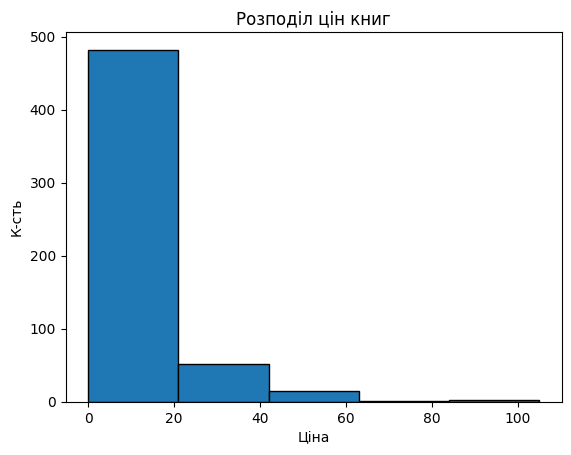

In [21]:
df["price"].plot(kind="hist", bins=5, edgecolor="black")

plt.title("Розподіл цін книг")
plt.xlabel("Ціна")
plt.ylabel("К-сть")